In [19]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import chi2

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
Income_train=pd.read_csv('/content/train.xls')
Income_test=pd.read_csv('/content/test.xls')
Housing = pd.read_excel("/content/housing.xlsx")

In [22]:
def pt_various_data_info(df):
    print("No of columns={}".format(len(df.columns)))
    print("No of rows={}".format(len(df.index)))
    print("No of entries={}".format(len(df.columns)*len(df.index)))
    print("Data Type=\n{}".format(df.dtypes.value_counts()))
    print("Shape of Dataframe={}".format(df.shape))
    print("Not Null values=\n{}".format(df.count()))
    for i in df.columns:
        print(i,df[i].isna().sum())

In [23]:
pt_various_data_info(Income_train)

No of columns=143
No of rows=9557
No of entries=1366651
Data Type=
int64      130
float64      8
object       5
dtype: int64
Shape of Dataframe=(9557, 143)
Not Null values=
Id                 9557
v2a1               2697
hacdor             9557
rooms              9557
hacapo             9557
                   ... 
SQBovercrowding    9557
SQBdependency      9557
SQBmeaned          9552
agesq              9557
Target             9557
Length: 143, dtype: int64
Id 0
v2a1 6860
hacdor 0
rooms 0
hacapo 0
v14a 0
refrig 0
v18q 0
v18q1 7342
r4h1 0
r4h2 0
r4h3 0
r4m1 0
r4m2 0
r4m3 0
r4t1 0
r4t2 0
r4t3 0
tamhog 0
tamviv 0
escolari 0
rez_esc 7928
hhsize 0
paredblolad 0
paredzocalo 0
paredpreb 0
pareddes 0
paredmad 0
paredzinc 0
paredfibras 0
paredother 0
pisomoscer 0
pisocemento 0
pisoother 0
pisonatur 0
pisonotiene 0
pisomadera 0
techozinc 0
techoentrepiso 0
techocane 0
techootro 0
cielorazo 0
abastaguadentro 0
abastaguafuera 0
abastaguano 0
public 0
planpri 0
noelec 0
coopele 0
sanitario1 0
sani

In [24]:
#first ten and 
Income_train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.0,100.0,784,4


In [25]:
#last ten
Income_train.tail(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
9547,ID_198be48d1,46500.0,0,5,0,1,1,0,NaN,1,...,121,529,25,4,4,5.444444,0.444444,100.0000,529,4
9548,ID_9df63c33e,46500.0,0,5,0,1,1,0,NaN,1,...,121,324,25,4,4,5.444444,0.444444,100.0000,324,4
9549,ID_aacac04a2,46500.0,0,5,0,1,1,0,NaN,1,...,0,4,25,4,4,5.444444,0.444444,100.0000,4,4
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,36,3721,4,0,0,4.000000,1.000000,9.0000,3721,2
9551,ID_79d39dddc,NaN,0,3,0,1,1,0,NaN,0,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.062500,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.062500,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.062500,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.062500,68.0625,676,2
9556,ID_a38c64491,80000.0,0,6,0,1,1,0,NaN,0,...,64,441,25,81,1,1.562500,0.062500,68.0625,441,2


In [26]:
def print_numerical_columns(df):
    print(df.select_dtypes(include=['int64','float64']).columns.tolist())

In [27]:
print_numerical_columns(Income_train)

['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',

In [28]:
def get_int_float_dtype_null_column_list(df):
    null_counts=df.select_dtypes(['int64','float64']).isnull().sum()
    return null_counts[null_counts > 0]

In [29]:
get_int_float_dtype_null_column_list(Income_train)

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [30]:
def fill_int_float_dtype_null_cells_data_with_mean(df):
    #if want to do permanently use inplace=True
    df.fillna(df.mean(),inplace=True)

In [31]:
fill_int_float_dtype_null_cells_data_with_mean(Income_train)

In [32]:
def get_object_dtype_column_list(df):
    object_list=df.select_dtypes(include=['object']).columns.tolist()
    return object_list

In [33]:
x=get_object_dtype_column_list(Housing)
x

['ocean_proximity']

In [34]:
# Function to automatically get Object Dtype categorical column(s) (i.e, columns having <= (say 10) diff type of data):
def get_category_column_list(df_data, object_column_list):
    # Though in this case 'ocean_proximity' is the only column falling in this list having 5 distinct values. 
    #  I still have set the CATEGORY_COLUMN_MAX_DISTINCT_VAL as 10 for generic function purpose
    CATEGORY_COLUMN_MAX_DISTINCT_VAL = 10
    category_column_list = []
    category_column_val_list = []
    for col in object_column_list:
        col_val_list_count = df_data[col].value_counts()
        if col_val_list_count.size <= CATEGORY_COLUMN_MAX_DISTINCT_VAL:
            category_column_list.append(col)
            category_column_val_list.append(df_data[col].value_counts().index.to_list())
            print("\nDistinct Values of the Category [", col, "]:\n", df_data[col].value_counts())
            print(df_data[col].value_counts().index.to_list())
    return category_column_list, category_column_val_list


In [35]:
category_column_list, category_column_val_list = get_category_column_list(Housing, x)
print('\nGet Category column list: ', category_column_list, category_column_val_list)


Distinct Values of the Category [ ocean_proximity ]:
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

Get Category column list:  ['ocean_proximity'] [['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']]


In [36]:
# This fn creates additional "columnValue" column(s) for the corresponding object categorical column(s) 
#      and corresponding data value(s) for all except the last data value ():
def apply_category_column_encoding(df_data, category_column_list, category_column_val_list):
    category_column_idx = -1   
    for col in category_column_list:
        category_column_idx = category_column_idx + 1   
        # One Hot Encoding will be done all values minus 1 
        count_category_column_val_list = len(category_column_val_list[category_column_idx]) -1
        for idx in range(count_category_column_val_list):
            df_data[category_column_val_list[category_column_idx][idx]] = df_data[col].apply((lambda x: 1 if x == category_column_val_list[category_column_idx][idx] else 0))

In [37]:
apply_category_column_encoding(Housing,category_column_list,category_column_val_list)
Housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,0,0,0,1
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,0,0,0,1
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400,0,0,0,1
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700,0,0,0,1
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100,0,0,0,1


In [38]:
def ocean_poximity(df):
    return Housing.groupby(['ocean_proximity']).count()

In [39]:
ocean_poximity(Income_train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY
ocean_proximity,,,,,,,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9034,9136,9136,9136,9136,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6496,6551,6551,6551,6551,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2270,2290,2290,2290,2290,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2628,2658,2658,2658,2658,2658,2658,2658,2658


In [40]:
#cleaing dataset
mapping={'yes':1,'no':0}

Income_train['dependency'] =Income_train['dependency'].replace(mapping).astype(np.float64)
Income_train['edjefe'] =Income_train['edjefe'].replace(mapping).astype(np.float64)
Income_train['edjefa'] =Income_train['edjefa'].replace(mapping).astype(np.float64)

In [41]:
heads = Income_train.loc[Income_train['parentesco1'] == 1].copy()

In [42]:
Income_train.update(Income_train[['v2a1','v18q1','rez_esc','meaneduc','SQBmeaned']].fillna(0))

In [43]:
def biased(df):
    target_counts = heads['Target'].value_counts().sort_index()
    if target_counts[1]<(target_counts[2] & target_counts[3] & target_counts[4]):
        print("Dataset is Biased")
    else:
        print("Dataset is Not Biased")


In [44]:
biased(Income_train)

Dataset is Biased


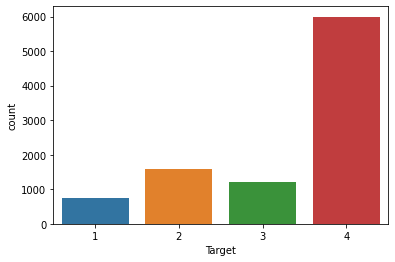

In [45]:
import seaborn as sns 
sns.countplot(Income_train['Target']) 

In [46]:
def check_poverty(df):
    equal = df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
    not_equal = equal[equal != True]
    print('There are {} households where the family members of the house do not have the same poverty level.'.format(len(not_equal)))
    print('There are {} households where the family members of the house have the same poverty level.'.format(len(equal)-len(not_equal)))

In [47]:
check_poverty(Income_train)

There are 85 households where the family members of the house do not have the same poverty level.
There are 2903 households where the family members of the house have the same poverty level.


In [48]:
def check_head(df): 
    households_head = df.groupby('idhogar')['parentesco1'].sum()
    households_no_head = df.loc[df['idhogar'].isin(households_head[households_head == 0].index), :]
    households_one_head = df.loc[df['idhogar'].isin(households_head[households_head == 1].index), :]
    print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))
    print('There are {} households with a head.'.format(households_one_head['idhogar'].nunique()))

In [49]:
check_head(Income_train)

There are 15 households without a head.
There are 2973 households with a head.


In [50]:
#set_poverty
family_target_value_changed_count = 0
for i in Income_train['idhogar'].unique():
    if (Income_train[Income_train['idhogar'] == i]['Target'].unique().size > 1):
        row_index = Income_train[Income_train['idhogar'] == i].loc[:, ['Target']].index
        row_index_size = row_index.size
        target_val = -1
        parentesco1_found = -1
        for j in range(row_index_size):
            if Income_train.loc[row_index[j], 'parentesco1'] == 1:
                parentesco1_found = 1
                target_val = Income_train.loc[row_index[j], 'Target']
            else:
                if parentesco1_found == -1:
                    if target_val > Income_train.loc[row_index[j], 'Target']:
                        target_val = Income_train.loc[row_index[j], 'Target']
            
#             print(income_train_df.loc[row_index[j], 'parentesco1'], income_train_df.loc[row_index[j], 'Target'])
        
        if target_val > -1:
            family_target_value_changed_count = family_target_value_changed_count + 1
#             print('Setting Target Value for : idhogar: ', i, ' ; parentesco1_found:', parentesco1_found, ' : Target: ', target_val)
            Income_train.loc[row_index, 'Target'] = target_val
#     else:
#         print('All Target Value is set properly')
print('family_target_value_changed_count: ', family_target_value_changed_count)

family_target_value_changed_count:  85


In [51]:
def remove_null_at_target(df):
    df = df.dropna(axis=0, subset=['Target'])

In [52]:
remove_null_at_target(Income_train)

In [53]:
def merge(df,df1):
    result = pd.concat([df, df1])
    return result

In [54]:
merge(Income_train,Housing)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY
0,ID_279628684,190000.000000,0.0,3.0,0.0,1.0,1.0,0.0,1.404063,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_f29eb3ddd,135000.000000,0.0,4.0,0.0,1.0,1.0,1.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_68de51c94,165231.606971,0.0,8.0,0.0,1.0,1.0,0.0,1.404063,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_d671db89c,180000.000000,0.0,5.0,0.0,1.0,1.0,1.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_d56d6f5f5,180000.000000,0.0,5.0,0.0,1.0,1.0,1.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,374.0,845.0,330.0,1.5603,INLAND,78100.0,0.0,1.0,0.0,0.0
20636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,356.0,114.0,2.5568,INLAND,77100.0,0.0,1.0,0.0,0.0
20637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,485.0,1007.0,433.0,1.7000,INLAND,92300.0,0.0,1.0,0.0,0.0
20638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,409.0,741.0,349.0,1.8672,INLAND,84700.0,0.0,1.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## CREATE X and y
Income_train.drop(['Id','idhogar'],axis=1,inplace=True)
X_data=Income_train.drop('Target',axis=1)
Y_data=Income_train.Target
X_data_col=X_data.columns
SS=StandardScaler()
X_data_1=SS.fit_transform(X_data)
X_data_1=pd.DataFrame(X_data_1,columns=X_data_col)

X_train,X_test,Y_train,Y_test=train_test_split(X_data_1,Y_data,test_size=0.25,stratify=Y_data,random_state=0)

In [56]:
# As dataset is not balanced, we will need to do Over sampling 
from sklearn.model_selection import cross_val_score 
from imblearn.over_sampling import RandomOverSampler 
oversampler_ros = RandomOverSampler() 
#sampling_strategy='minority') 
X_train_ros, y_train_ros = oversampler_ros.fit_resample(X_train, Y_train) 
X_train_ros.shape, y_train_ros.shape 

((18012, 140), (18012,))

In [57]:
from sklearn.linear_model import LinearRegression
# class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None): 
linReg = LinearRegression(normalize=False)
linReg.fit(X_train, Y_train)

LinearRegression(normalize=False)

In [58]:
y_final_test_pred = linReg.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_final_test_pred)

0.6426630631038762